In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv ("/content/drive/My Drive/master_dataset/extracted_features.csv")

In [ ]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ]

In [ ]:
print ( "classes are : " , np.unique ( Y ) )


classes are :  [0. 1.]


In [ ]:
X.shape

(904, 4620)

In [ ]:
Y.shape

(904,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

In [ ]:
X_train

array([[ 0.25000036,  0.25124519,  0.25159178, ..., -0.22544   ,
        -0.20762   , -0.19633   ],
       [ 0.12661237,  0.12668899,  0.12773296, ..., -0.11575   ,
        -0.11857   , -0.09673   ],
       [ 0.26256645,  0.2612467 ,  0.26092251, ..., -0.66835   ,
        -0.64648   , -0.56575   ],
       ...,
       [ 0.33938133,  0.33893122,  0.3393757 , ..., -0.38246   ,
        -0.36795   , -0.30057   ],
       [ 0.35476254,  0.35532313,  0.35719844, ..., -0.21354   ,
        -0.12356   , -0.05735   ],
       [ 0.35891821,  0.35962597,  0.3595616 , ..., -0.59564   ,
        -0.65448   , -0.72532   ]])

In [ ]:
X_test

array([[ 0.17352835,  0.17336474,  0.17380241, ..., -0.1387    ,
        -0.1563    , -0.22984   ],
       [ 0.07983144,  0.07993921,  0.07997144, ..., -0.093     ,
        -0.1716    , -0.20171   ],
       [ 0.34434355,  0.34401819,  0.3437729 , ..., -0.46561   ,
        -0.43507   , -0.43249   ],
       ...,
       [ 0.37341267,  0.37306699,  0.37429125, ..., -0.91708   ,
        -1.11263   , -1.09285   ],
       [ 0.45509412,  0.45591108,  0.45589959, ..., -0.49271   ,
        -0.46354   , -0.43804   ],
       [ 0.43551176,  0.43598961,  0.43677587, ..., -1.01453   ,
        -1.08037   , -1.05803   ]])

In [ ]:
# model = RandomForestClassifier( n_estimators=100 , random_state = 7 )
model=svm.SVC(gamma='scale')

In [ ]:
model.fit(X_train,Y_train)
# cm = confusion_matrix(Y_test,cf.predict(X_test))
# sns.heatmap(cm,annot=True,fmt="d")

SVC()

In [ ]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.75


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

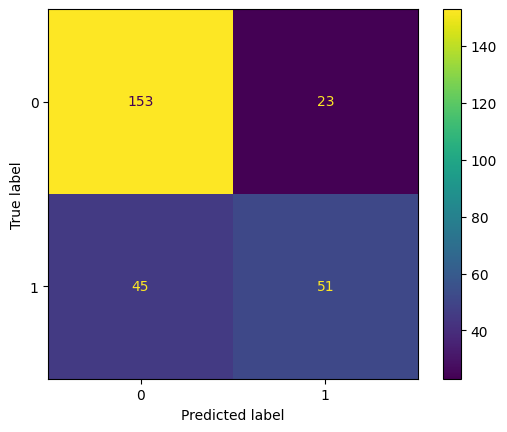

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[153,  23],
       [ 45,  51]])

In [ ]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.75


In [ ]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
print("Sensitivity:", confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]))


Sensitivity: 0.8693181818181818


In [ ]:
# Change the variable name 'a' to 'confusion_matrix'
print("Specificty:", confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))

Specificty: 0.53125


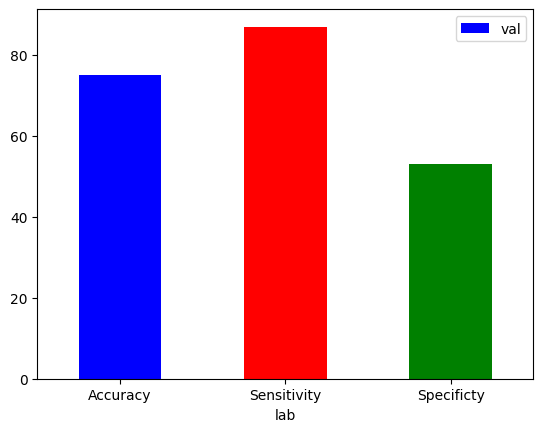

In [ ]:
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[75,86.9,53.1]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])